## Yet another Version

In [130]:
import numpy as np
import pandas as pd

def p6c_stock_bond_paths(S0, B0, mu, sigma, r, T, N, save_plot=True):
    # Arrays to store results
    log_S = np.zeros(N+1)
    S = np.zeros(N+1)
    B = np.zeros(N+1)

    # Initial values
    log_S[0] = np.log(S0)
    S[0] = S0
    B[0] = B0
    X[0] = np.exp(-r * T) * S0 ** p
    V[0] = np.exp(-r * T) * S0 ** p
    delta[0] = p * np.exp(-r * T) * S0 ** (p-1)

    dt = T / N  # Time step

    # Simulation loop
    for i in range(1, N+1):
        t = dt * i
        z = np.random.normal(loc=0, scale=1)

        # Stock
        log_S[i] = log_S[i-1] + (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z
        S[i] = np.exp(log_S[i])

        # Bond
        B[i] = np.exp(r * t)
        
    if save_plot:
        res = pd.DataFrame({'S': S, 'B': B})
        ax = res.plot(kind='line')

        # Add title and labels
        ax.set_title("Stock vs Bond Path")
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")

        plt.savefig('problem_6c_SvsB.png')    
    return S, B
        
def p6d_portfolio_claim_paths(S0, B0, mu, sigma, r, T, p, N, save_plot=True):
    # Arrays to store results
    log_S = np.zeros(N+1)
    S = np.zeros(N+1)
    B = np.zeros(N+1)
    X = np.zeros(N+1)
    delta = np.zeros(N+1)
    V = np.zeros(N+1)

    # Initial values
    log_S[0] = np.log(S0)
    S[0] = S0
    B[0] = B0
    X[0] = np.exp(-r * T) * S0 ** p
    V[0] = np.exp(-r * T) * S0 ** p
    delta[0] = p * np.exp(-r * T) * S0 ** (p-1)

    dt = T / N  # Time step

    # Simulation loop
    for i in range(1, N+1):
        t = dt * i
        z = np.random.normal(loc=0, scale=1)

        # Stock
        log_S[i] = log_S[i-1] + (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z
        S[i] = np.exp(log_S[i])

        # Bond
        B[i] = np.exp(r * t)

        # Claim Value
        V[i] = np.exp(-r * (T - t)) * S[i] ** p

        # Replication Portfolio
        delta[i] = p * np.exp(-r * (T - t)) * S[i] ** (p-1)
        X[i] = X[i-1] + delta[i] * (S[i] - S[i-1]) + (X[i-1] - delta[i-1] * S[i-1]) * (1 / B[i-1]) * (B[i] - B[i-1])

    if save_plot:
        res = pd.DataFrame({'V': V, 'X': X})

        ax = res.plot(kind='line')
        # Add title and labels
        ax.set_title("Claim Value vs Replication Portfolio Path")
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")

        plt.savefig('problem_6d_XvsV.png')        
    return V, X

def p6f_portfolio_claim_diff(S0, B0, mu, sigma, r, T, p, N, M, save_plot=True):
    x_v_diff = np.zeros(M)
    for i in range(M):
        v, x = p6d_portfolio_claim_paths(S0, B0, mu, sigma, r, T, p, N, save_plot=False)
        x_v_diff[i] = x[-1] - v[-1]
        
    if save_plot:
        res = pd.Series(x_v_diff)
        ax = res.plot(kind='hist', bins=50)
    
        # Add title and labels
        ax.set_title("Replication Portfolio vs Claim Value Distribution")
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")

        plt.savefig('problem_6f_X_V_distrib.png')        
    
    return x_v_diff

In [131]:
# Inputs
S0 = 1  # Initial stock price
B0 = 1    # Initial bond price
r = 0.03  # Risk-free interest rate
mu = 0.1  # Drift
sigma = 0.2  # Volatility
p = -2      # Power for claim payoff
T = 1      # Terminal time
N = 100    # Number of time steps
M = 1000

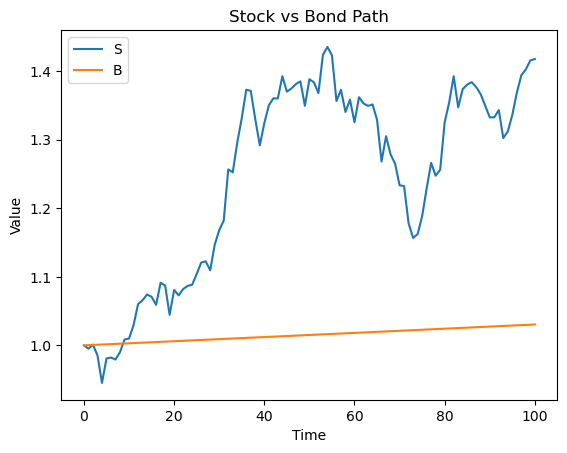

In [134]:
_ = p6c_stock_bond_paths(S0, B0, mu, sigma, r, T, N, save_plot=True)

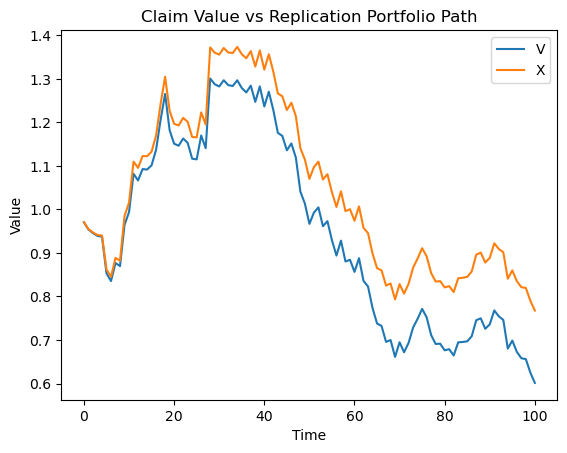

In [133]:
_ = p6d_portfolio_claim_paths(S0, B0, mu, sigma, r, T, p, N, save_plot=True)

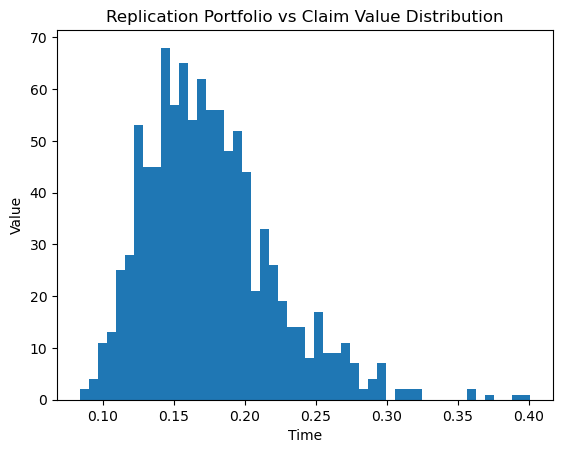

In [132]:
_ = p6f_portfolio_claim_diff(S0, B0, mu, sigma, r, T, p, N, M, save_plot=True)

In [110]:



# Arrays to store results
log_S = np.zeros(N+1)
S = np.zeros(N+1)
B = np.zeros(N+1)
X = np.zeros(N+1)
delta = np.zeros(N+1)
V = np.zeros(N+1)

# Initial values
log_S[0] = np.log(S0)
S[0] = S0
B[0] = B0
X[0] = np.exp(-r * T) * S0 ** p
V[0] = np.exp(-r * T) * S0 ** p
delta[0] = p * np.exp(-r * T) * S0 ** (p-1)

dt = T / N  # Time step

# Simulation loop
for i in range(1, N+1):
    t = dt * i
    z = np.random.normal(loc=0, scale=1)

    # Stock
    log_S[i] = log_S[i-1] + (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z
    S[i] = np.exp(log_S[i])

    # Bond
    B[i] = np.exp(r * t)

    # Claim Value
    V[i] = np.exp(-r * (T - t)) * S[i] ** p

    # Replication Portfolio
    delta[i] = p * np.exp(-r * (T - t)) * S[i] ** (p-1)
    X[i] = X[i-1] + delta[i] * (S[i] - S[i-1]) + (X[i-1] - delta[i-1] * S[i-1]) * (1 / B[i-1]) * (B[i] - B[i-1])

# Print or plot the results as needed

In [152]:
with open ('input.txt', 'r') as f:
# To split 
    num = f.readline().split(',')  


1

In [156]:
data = pd.read_csv('input.txt', header=None).squeeze()

In [158]:
int(data[6])

-2

In [137]:
import os